In [1]:
import requests
import json
from bs4 import BeautifulSoup
import lxml
import pandas as pd
from highlight_text import fig_text
from mplsoccer import VerticalPitch,Pitch
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
from adjustText import adjust_text
from urllib.request import urlopen
import matplotlib as mpl
from PIL import Image
from mplsoccer import Pitch, add_image
plt.style.use('default')
import matplotlib.font_manager as fm
import os

In [2]:
url = "https://understat.com/team/Everton/2019"
r = requests.get(url)
soup = BeautifulSoup(r.content, 'lxml')
scripts = soup.find_all('script')
strings = scripts[1].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
json_data = json.loads(json_data)

In [3]:

MatchesPlayed = [json_data[i]["id"] for i in range(len(json_data))]


EPL - Crystal Palace VS Everton (10 August 2019) (A) : https://understat.com/match/11647
EPL - Everton VS Watford (17 August 2019) (H) : https://understat.com/match/11656
EPL - Aston Villa VS Everton (23 August 2019) (A) : https://understat.com/match/11663
EPL - Everton VS Wolverhampton Wanderers (1 September 2019) (H) : https://understat.com/match/11681
EPL - Bournemouth VS Everton (15 September 2019) (A) : https://understat.com/match/11690
EPL - Everton VS Sheffield United (21 September 2019) (H) : https://understat.com/match/11698
EPL - Everton VS Manchester City (28 September 2019) (H) : https://understat.com/match/11711
EPL - Burnley VS Everton (5 October 2019) (A) : https://understat.com/match/11714
EPL - Everton VS West Ham (19 October 2019) (H) : https://understat.com/match/11727
EPL - Brighton VS Everton (26 October 2019) (A) : https://understat.com/match/11734
EPL - Everton VS Tottenham (3 November 2019) (H) : https://understat.com/match/11748
EPL - Southampton VS Everton (9 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1188\3285397311.py:158: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(6*3,4*3))


EPL - Everton VS Brighton (11 January 2020) (H) : https://understat.com/match/11860
EPL - West Ham VS Everton (18 January 2020) (A) : https://understat.com/match/11872
EPL - Everton VS Newcastle United (21 January 2020) (H) : https://understat.com/match/11877
EPL - Watford VS Everton (1 February 2020) (A) : https://understat.com/match/11891
EPL - Everton VS Crystal Palace (8 February 2020) (H) : https://understat.com/match/11897
EPL - Arsenal VS Everton (23 February 2020) (A) : https://understat.com/match/11903
EPL - Everton VS Manchester United (1 March 2020) (H) : https://understat.com/match/11916
EPL - Chelsea VS Everton (8 March 2020) (A) : https://understat.com/match/11925
EPL - Everton VS Liverpool (21 June 2020) (H) : https://understat.com/match/11940
EPL - Norwich VS Everton (24 June 2020) (A) : https://understat.com/match/11948
EPL - Everton VS Leicester (1 July 2020) (H) : https://understat.com/match/11958
EPL - Tottenham VS Everton (6 July 2020) (A) : https://understat.com/m

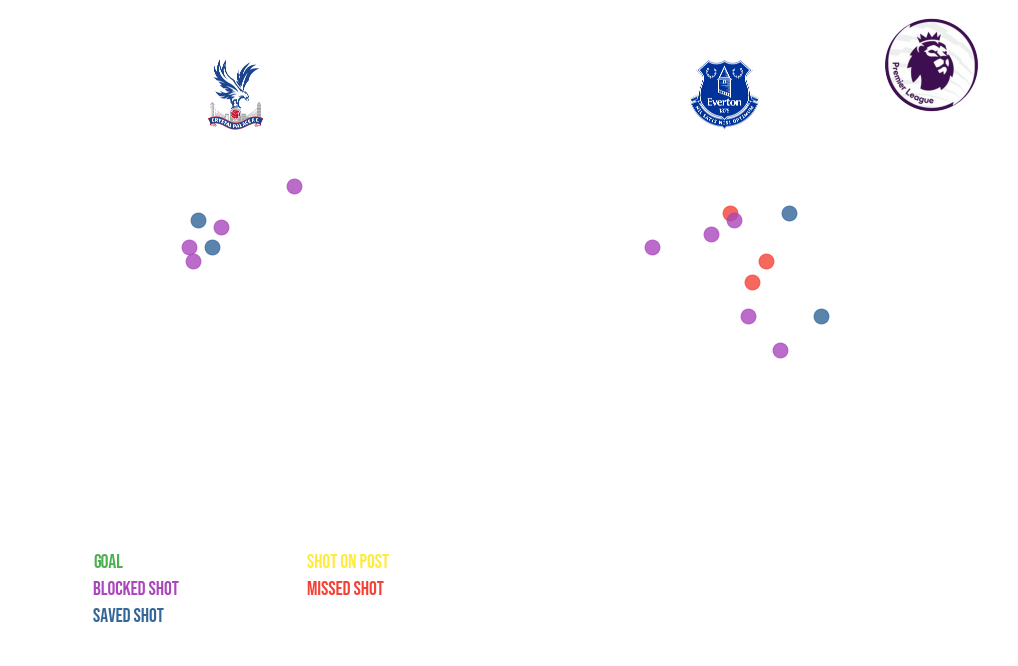

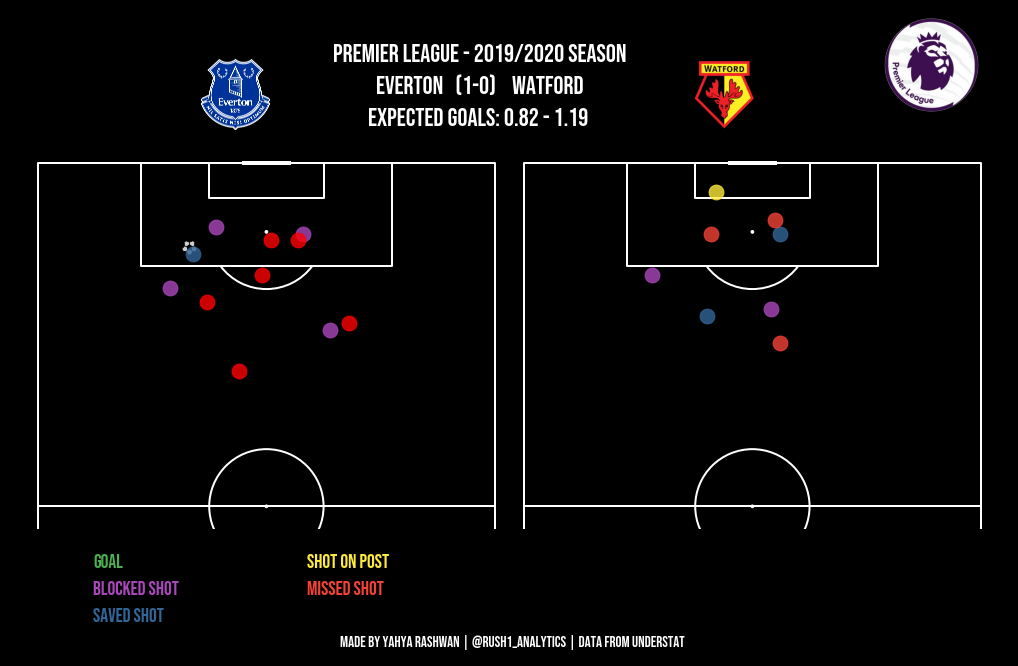

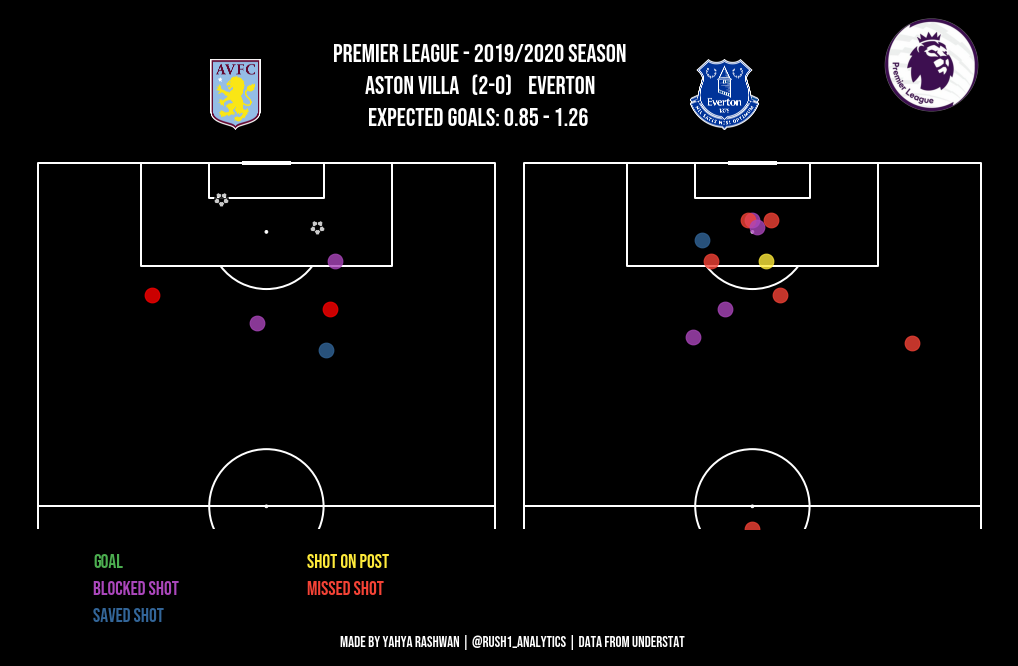

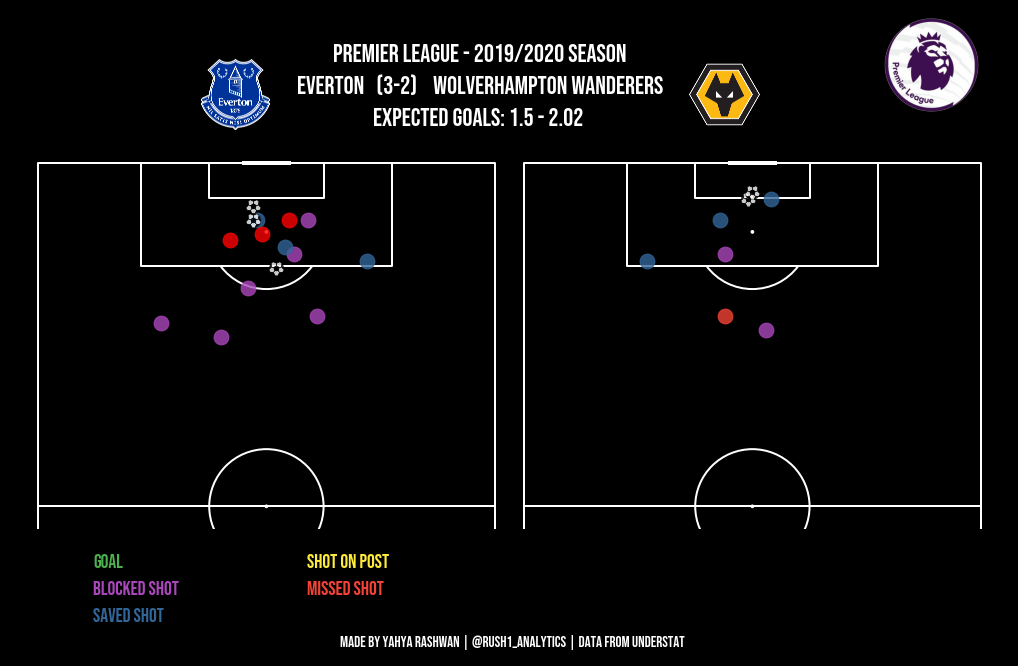

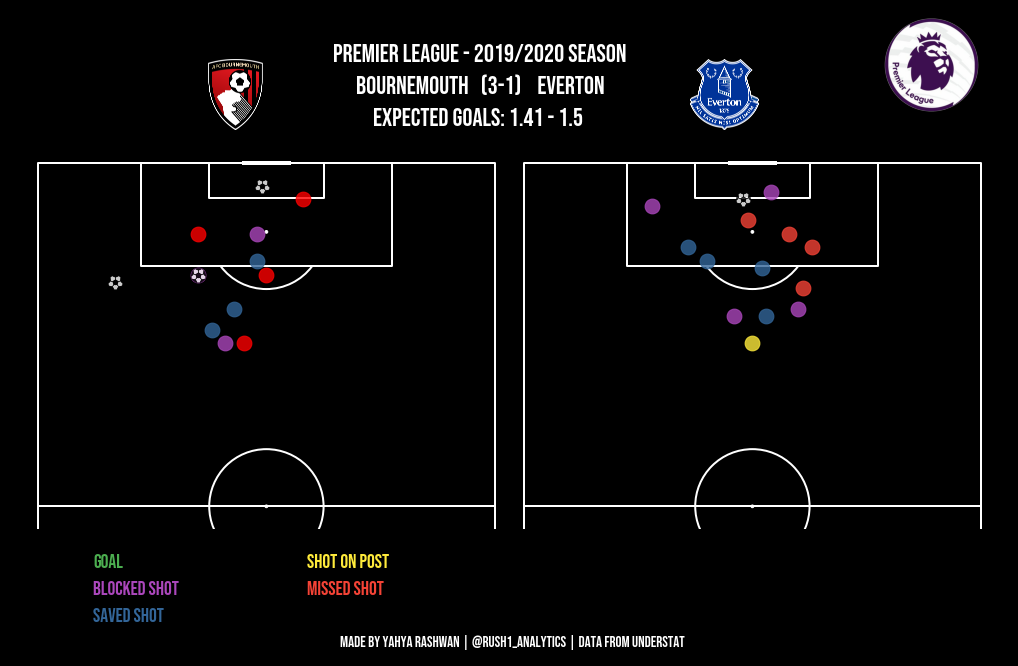

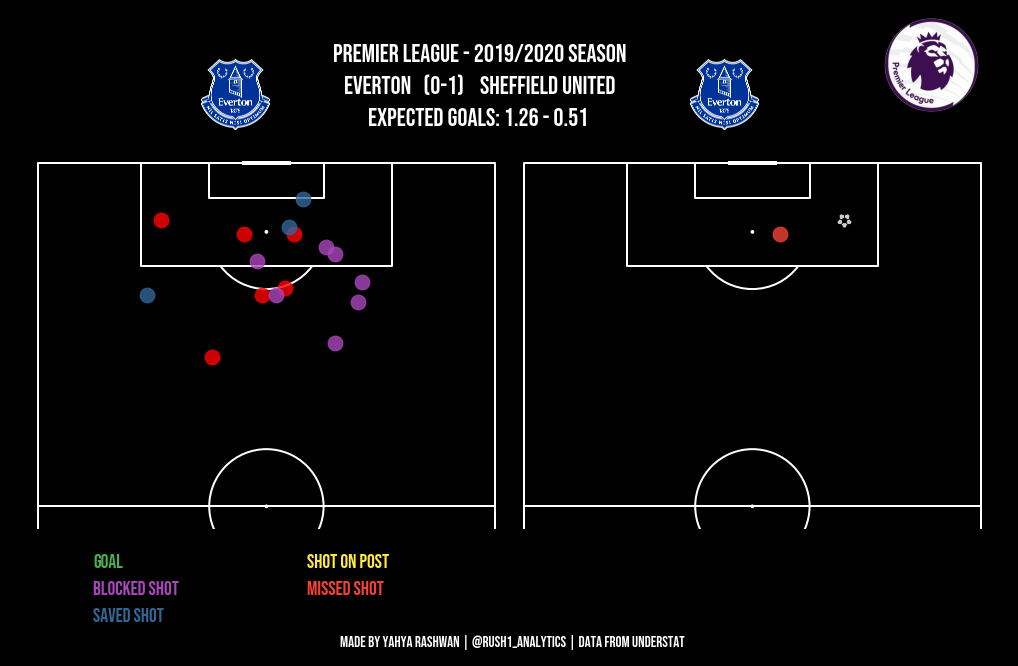

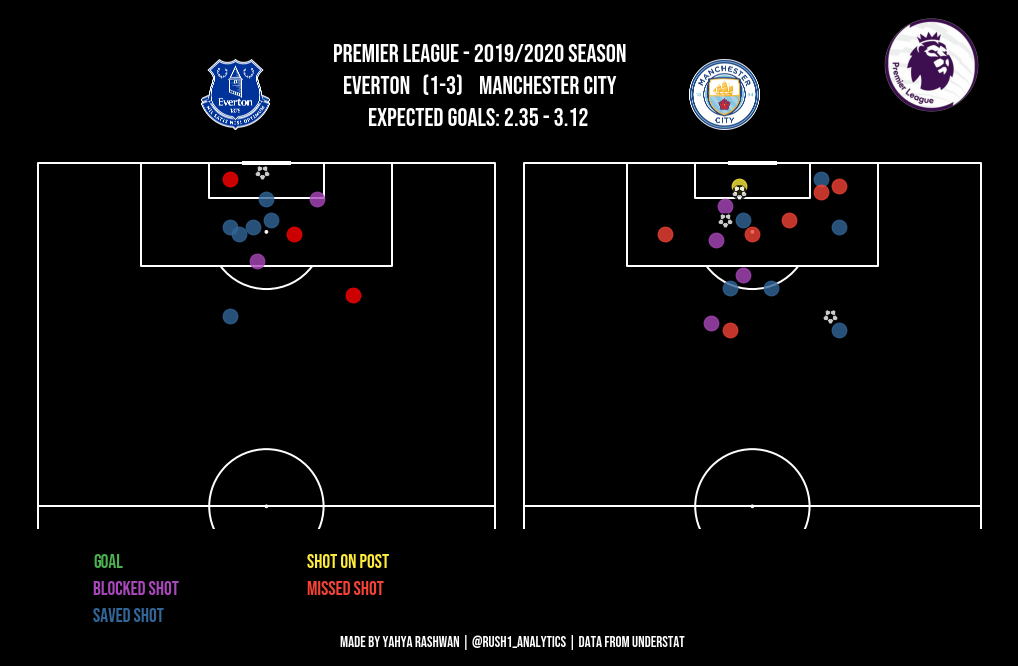

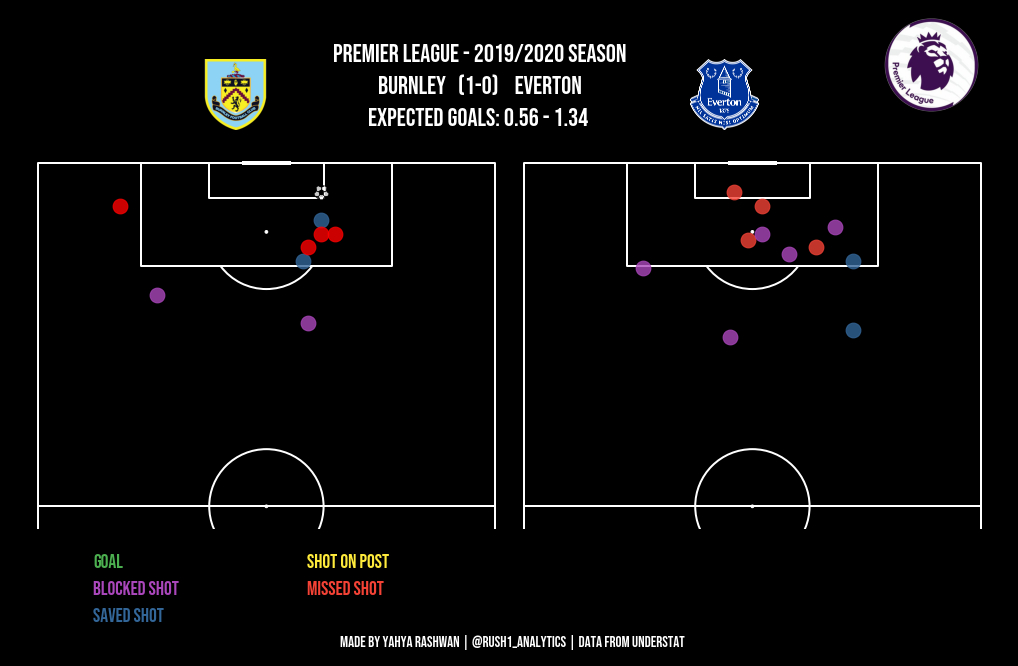

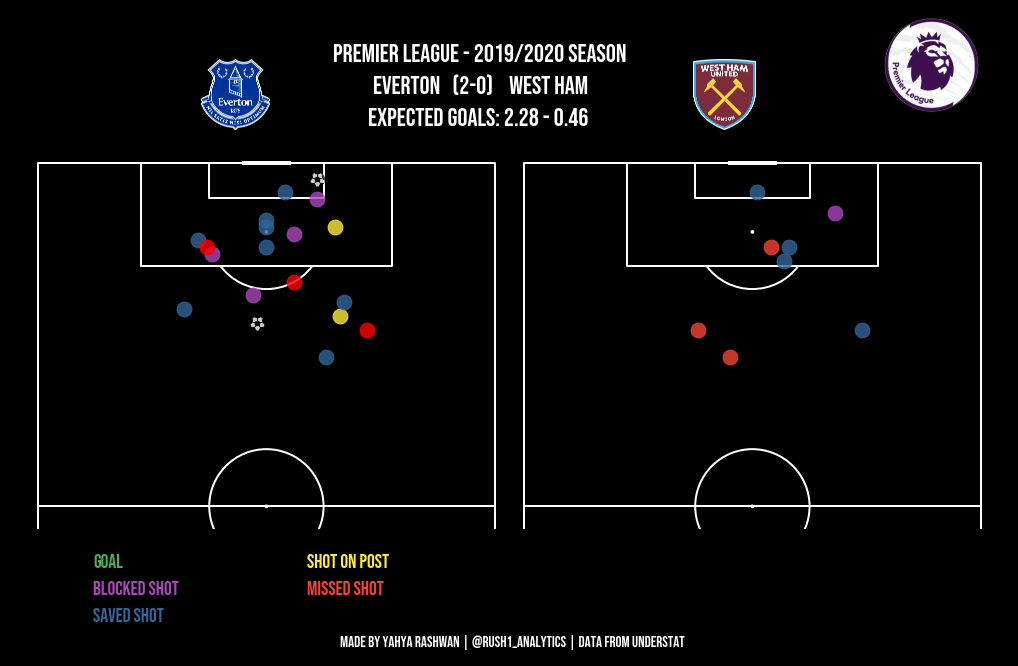

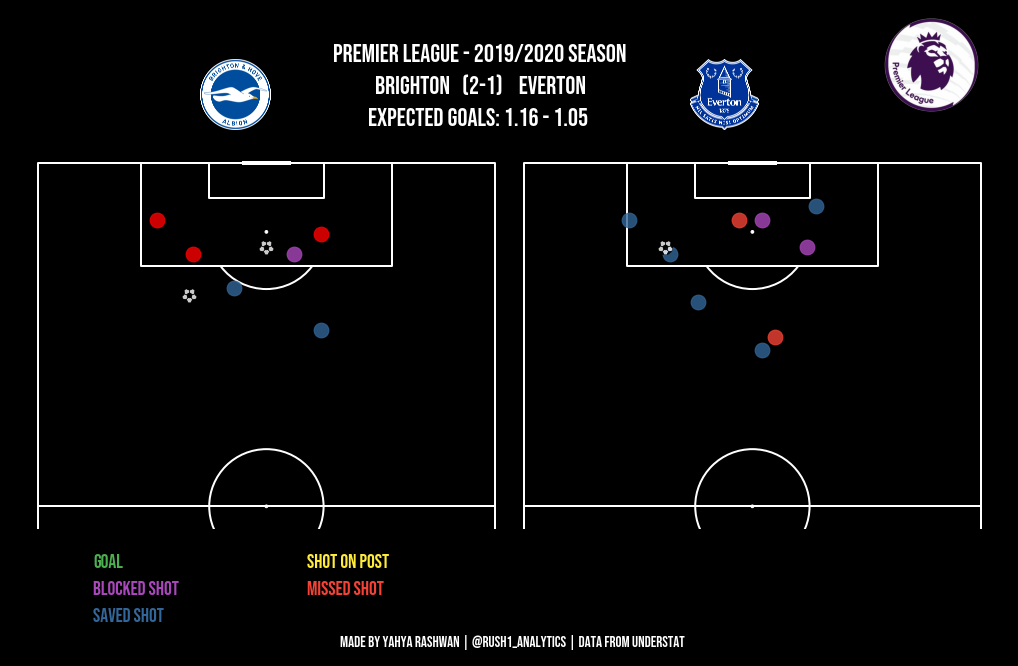

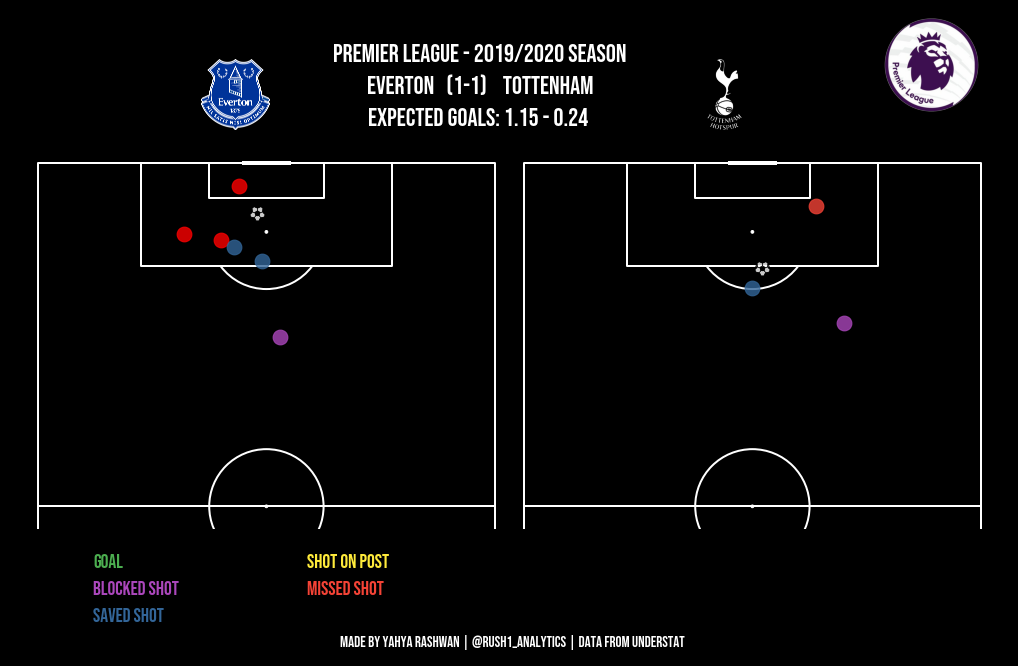

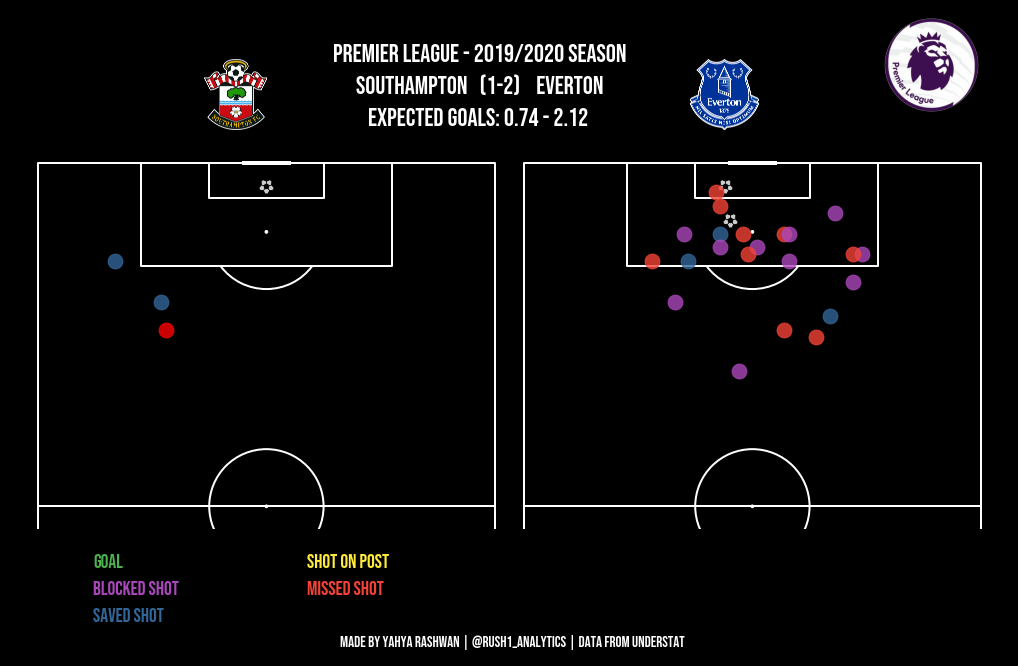

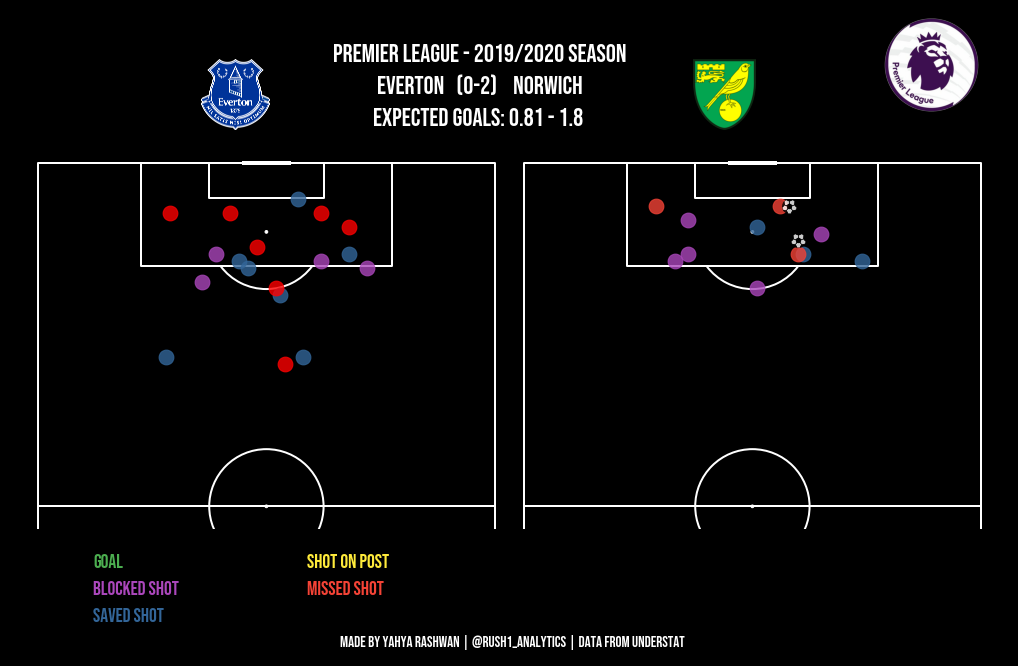

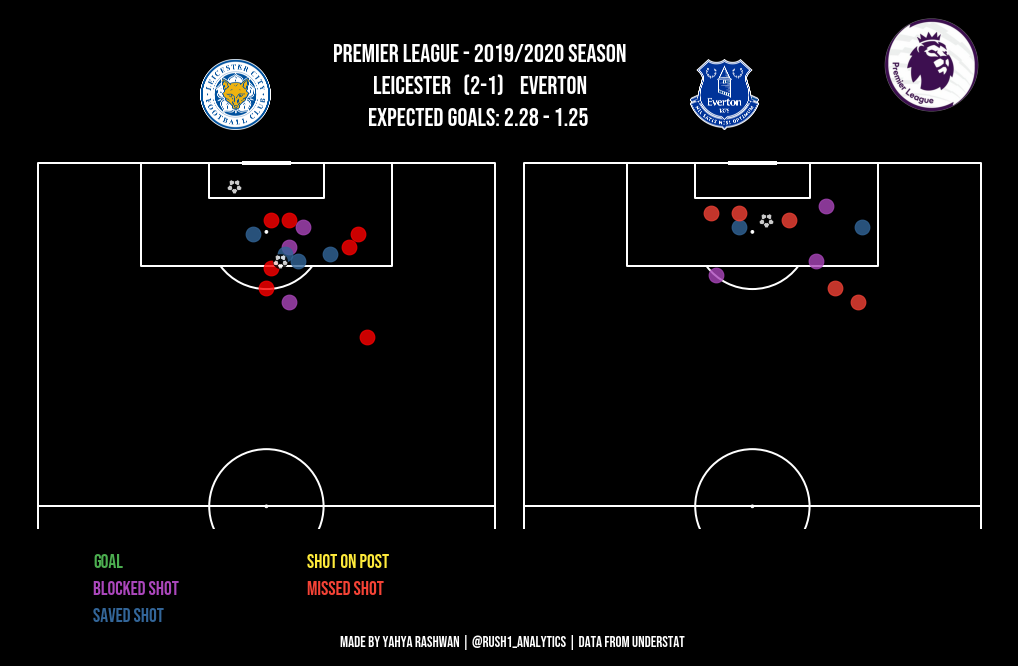

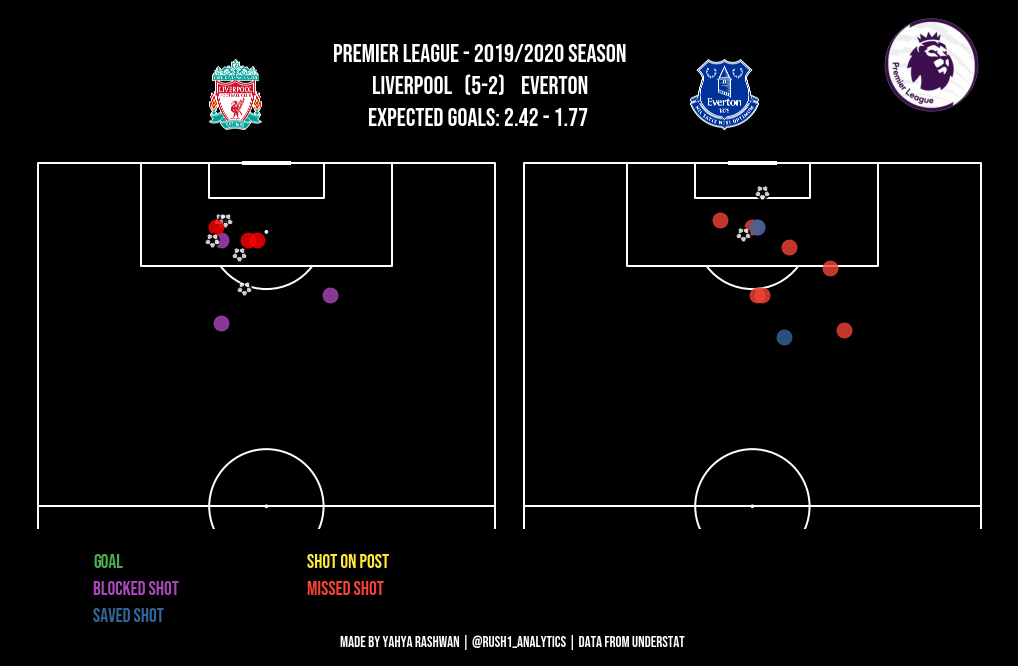

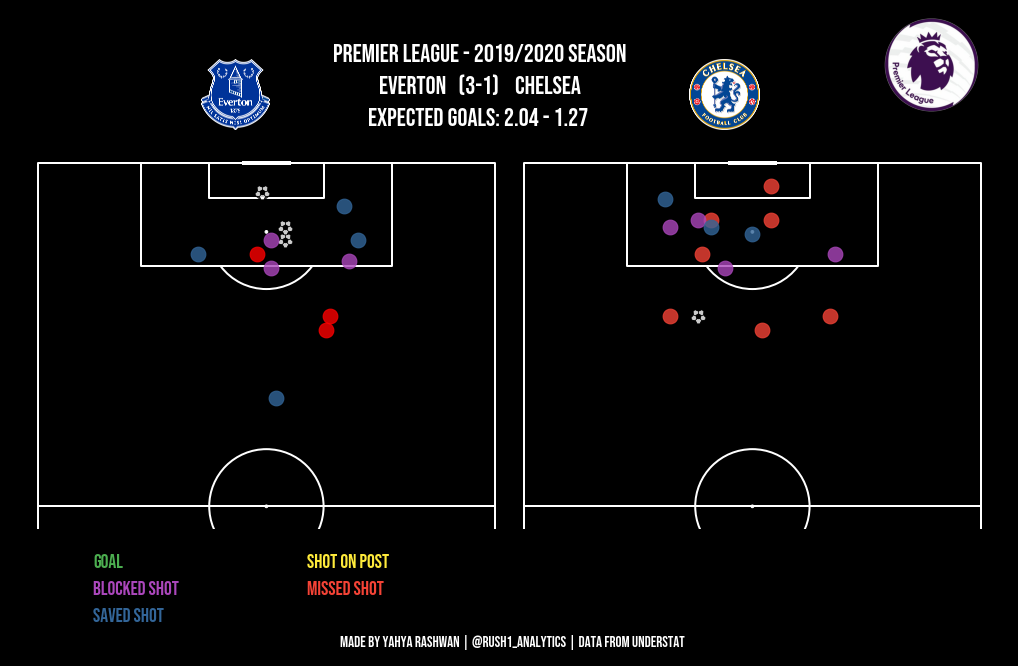

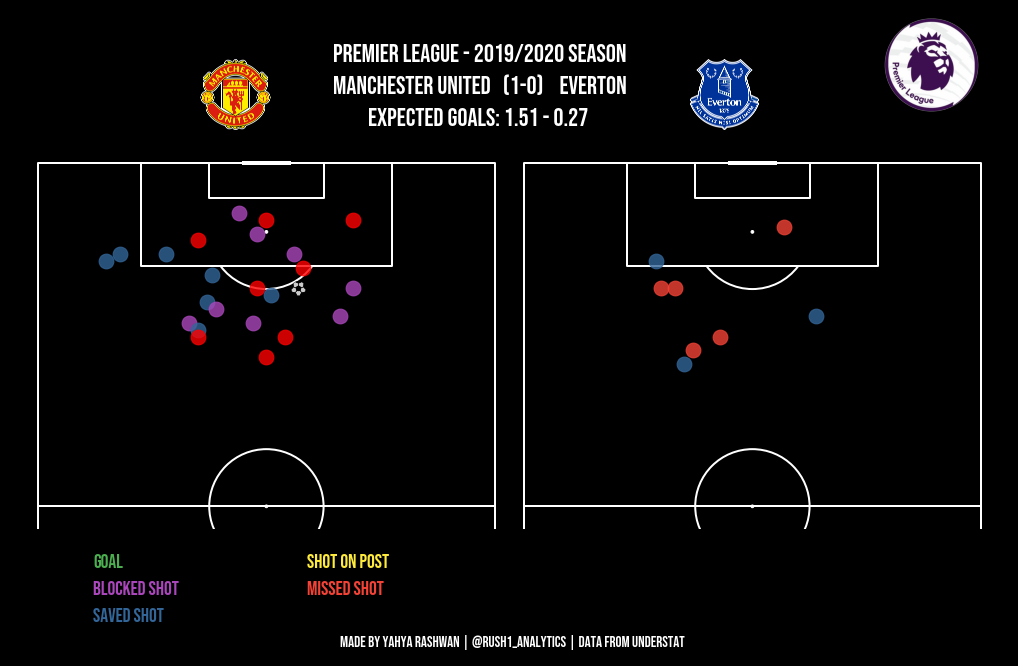

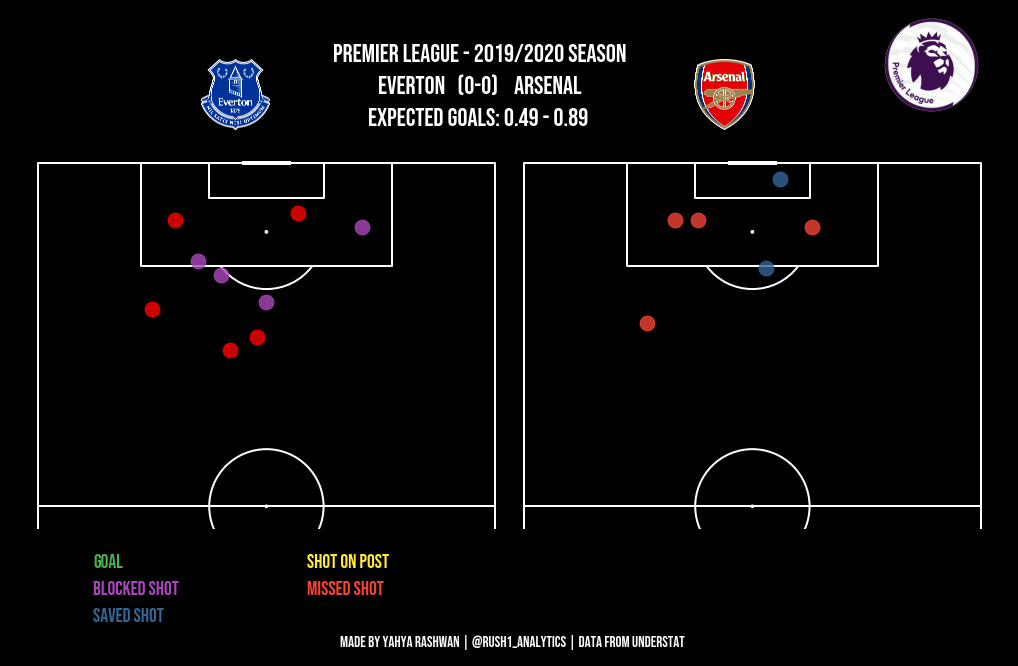

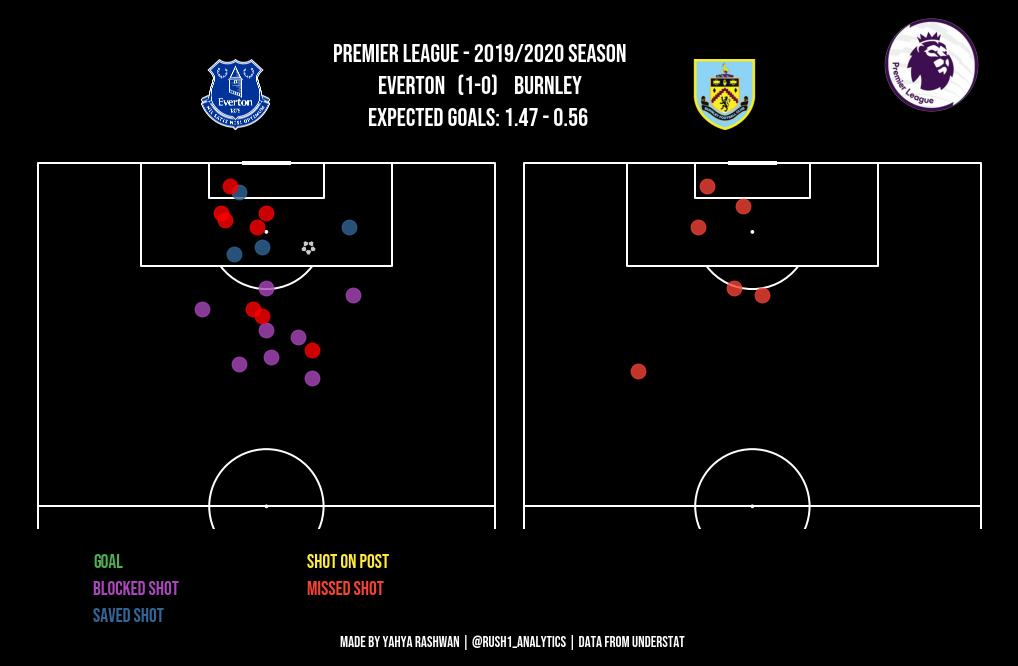

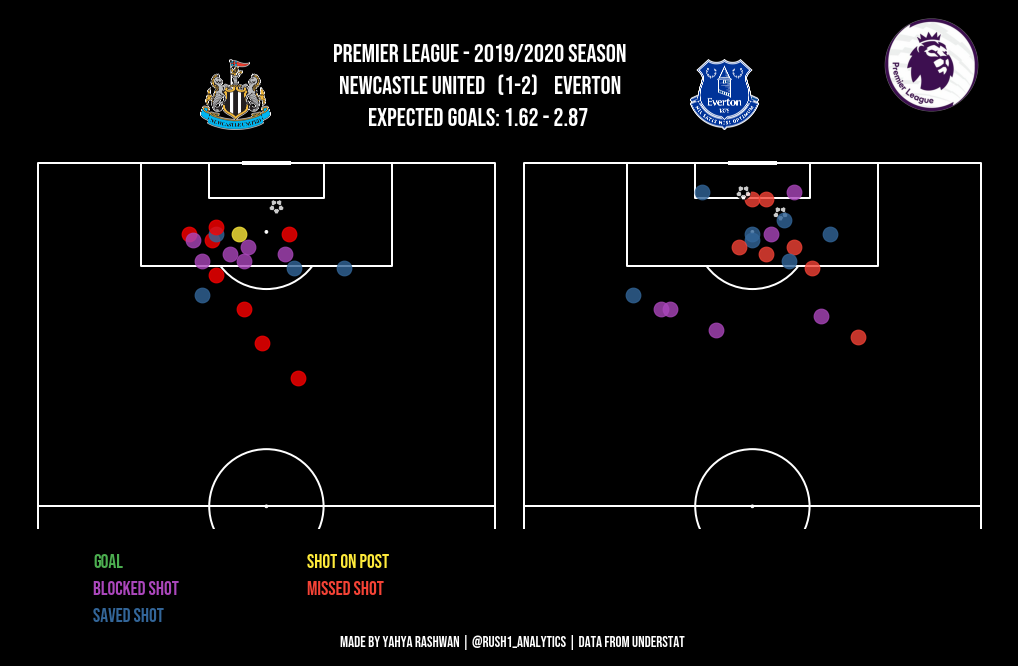

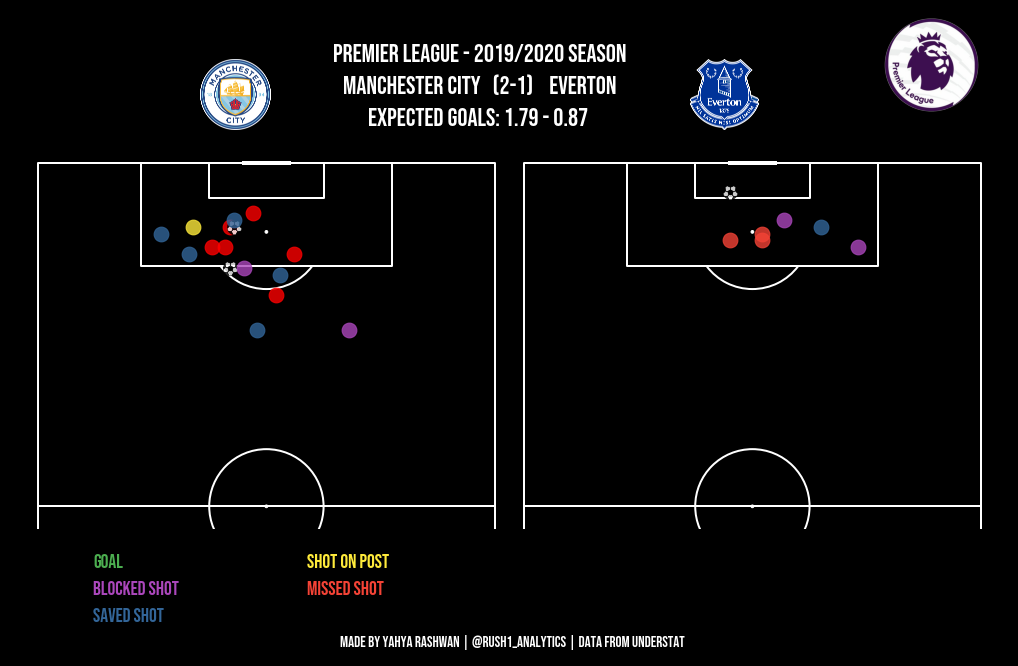

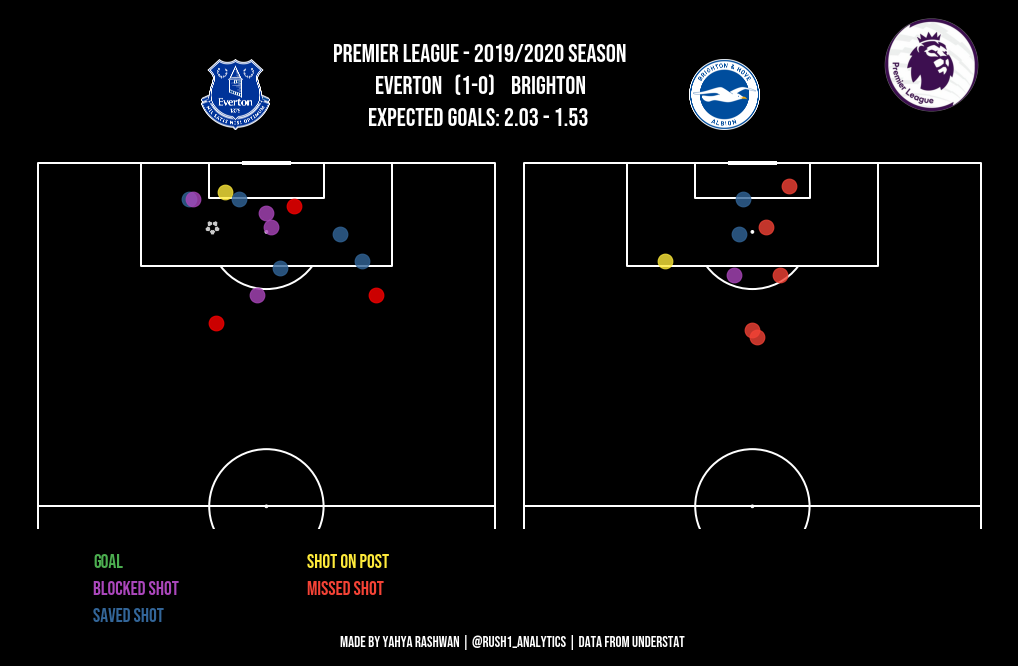

In [4]:
for i in MatchesPlayed:
    url = f"https://understat.com/match/{i}"
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    scripts = soup.find_all('script')
    strings = scripts[1].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    json_data = json.loads(json_data)
    title = soup.find_all('a')
    title = title[5].text
    HomeTeam = json_data["h"][0]["h_team"]
    AwayTeam = json_data["h"][0]["a_team"]
    date = pd.to_datetime(json_data['h'][0]['date'])
    date = f"{date.day} {date.month_name()} {date.year}"
    if HomeTeam == "Everton":
        print(f"{title} - {HomeTeam} VS {AwayTeam} ({date}) (H) : {url}")
    else:
        print(f"{title} - {HomeTeam} VS {AwayTeam} ({date}) (A) : {url}")
    
    h_minutes = [json_data['h'][i]['minute'] for i in range(len(json_data['h']))]
    h_X = [json_data['h'][i]['X'] for i in range(len(json_data['h']))]
    h_Y = [json_data['h'][i]['Y'] for i in range(len(json_data['h']))]
    h_xG = [json_data['h'][i]['xG'] for i in range(len(json_data['h']))]
    h_player_name = [json_data['h'][i]['player'] for i in range(len(json_data['h']))]
    h_assisted_by = [json_data['h'][i]['player_assisted'] for i in range(len(json_data['h']))]
    h_player_id = [json_data['h'][i]['player_id'] for i in range(len(json_data['h']))]
    h_player_team = [json_data['h'][i]['h_team'] for i in range(len(json_data['h']))]
    h_situation = [json_data['h'][i]['situation'] for i in range(len(json_data['h']))]
    h_result = [json_data['h'][i]['result'] for i in range(len(json_data['h']))]
    h_last_action = [json_data['h'][i]['lastAction'] for i in range(len(json_data['h']))]


    df_home = pd.DataFrame({'Minute':h_minutes,'X':h_X,'Y':h_Y,'xG':h_xG,'Player':h_player_name,'player_id':h_player_id,'Assist':h_assisted_by,'Home Team':h_player_team,'Situation':h_situation,"Last action":h_last_action,'Output':h_result})

    df_home['Minute'] = df_home['Minute'].astype(int)
    df_home['X'] = df_home['X'].astype(float).round(2)
    df_home['Y'] = df_home['Y'].astype(float).round(2)
    df_home['xG'] = df_home['xG'].astype(float).round(2)
    df_home['Minute'] = df_home['Minute'].astype(int)

    df_home.Output.replace(['MissedShots','SavedShot', 'BlockedShot','ShotOnPost','OwnGoal'],
                        ['Missed Shot','Saved Shot', 'Blocked Shot', 'Shot On Post','Own Goal'],inplace=True)
    df_home['Situation'].replace(['OpenPlay','DirectFreekick','FromCorner','SetPiece'],
                                ['Open Play','Direct Free kick','From Corner','Set Piece'] ,inplace=True)

    df_home['Last action'].replace(['BallRecovery', 'TakeOn','Throughball','LayOff', 'HeadPass','BallTouch','BlockedPass'],
                                ['Ball Recovery', 'Take On','Through ball','Lay Off', 'Head Pass','Ball Touch','Blocked Pass'],inplace=True)

    for i in range(len(df_home)):
        df_home['X'][i] = df_home['X'][i]*120 - 0.3
        df_home['Y'][i] = abs(df_home['Y'][i]*80 - 80)

    home_team = df_home['Home Team'].unique()[0]
    home_score = df_home[df_home['Output'] == 'Goal'].shape[0]
    home_score_xg = df_home['xG'].sum()
    home_score_xg = round(home_score_xg,2)

    a_minutes = [json_data['a'][i]['minute'] for i in range(len(json_data['a']))]
    a_X = [json_data['a'][i]['X'] for i in range(len(json_data['a']))]
    a_Y = [json_data['a'][i]['Y'] for i in range(len(json_data['a']))]
    a_xG = [json_data['a'][i]['xG'] for i in range(len(json_data['a']))]
    a_player_name = [json_data['a'][i]['player'] for i in range(len(json_data['a']))]
    a_assisted_by = [json_data['a'][i]['player_assisted'] for i in range(len(json_data['a']))]
    a_player_id = [json_data['a'][i]['player_id'] for i in range(len(json_data['a']))]
    a_player_team = [json_data['a'][i]['a_team'] for i in range(len(json_data['a']))]
    a_situation = [json_data['a'][i]['situation'] for i in range(len(json_data['a']))]
    a_result = [json_data['a'][i]['result'] for i in range(len(json_data['a']))]
    a_last_action = [json_data['a'][i]['lastAction'] for i in range(len(json_data['a']))]

    df_away = pd.DataFrame({'Minute':a_minutes,'X':a_X,'Y':a_Y,'xG':a_xG,'Player':a_player_name,'Assist':a_assisted_by,'player_id':a_player_id,'Away Team':a_player_team,'Situation':a_situation,'Last action':a_last_action,'Output':a_result})

    df_away['Minute'] = df_away['Minute'].astype(int)
    df_away['X'] = df_away['X'].astype(float).round(2)
    df_away['Y'] = df_away['Y'].astype(float).round(2)
    df_away['xG'] = df_away['xG'].astype(float).round(2)
    df_away['Minute'] = df_away['Minute'].astype(int)

    for i in range(len(df_away)):
        df_away['X'][i] = df_away['X'][i]*120 - 0.3
        df_away['Y'][i] = abs(df_away['Y'][i]*80-80)


    df_away.Output.replace(['MissedShots','SavedShot', 'BlockedShot','ShotOnPost','OwnGoal'],
                        ['Missed Shot','Saved Shot', 'Blocked Shot', 'Shot On Post',"Own Goal"],inplace=True)
    df_away['Situation'].replace(['OpenPlay','DirectFreekick','FromCorner','SetPiece'], 
                                ['Open Play','Direct Free kick','From Corner','Set Piece'] ,inplace=True)

    df_away['Last action'].replace(['BallRecovery', 'TakeOn','Throughball','LayOff', 'HeadPass','BallTouch','BlockedPass'],
                                ['Ball Recovery', 'Take On','Through ball','Lay Off', 'Head Pass','Ball Touch','Blocked Pass'],inplace=True)

    """""df['Shot type'].replace(['LeftFoot', 'RightFoot','OtherBodyPart'],
                                ['Left Foot','Right Foot' ,'Other Body Part'] ,inplace=True)"""""


    away_team = df_away['Away Team'].unique()[0]
    away_score = df_away[df_away['Output'] == 'Goal'].shape[0]
    away_score_xg = df_away['xG'].sum()
    away_score_xg = round(away_score_xg,2)

    if "OwnGoal" in df_away.Output.values:
        home_score += 1
        
        if "OwnGoal" in df_home.Output.values:
            away_score += 1

    Leagues = {'Ligue 1':"Ligue 1 uber eats",
        'EPL':"Premier League",
        'Serie A':"Serie A TIM",
        'La liga':"LaLiga Santander",
        'Bundesliga':"Bundesliga"}

    Leagues_logos = {'Ligue 1':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\Logo_Ligue_1_Uber_Eats_2020.svg.png",
        'EPL':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\Premier-League-PNG-Image.png",
        'Serie A':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\se1113l151-serie-a-logo-lega-serie-a-european-leagues.png",
        'La liga':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\6893566_preview.png",
        'Bundesliga':r"C:\Users\Administrator\Desktop\DataVizMaterial\Leagues logos\bundesliga-home-events.png"}

    if title in Leagues_logos.keys():
            league = Leagues[title]
            league_logo = Leagues_logos[title]
            #print(league,": ",league_logo)

    for root,dirs,files in os.walk(r"C:\Users\Administrator\Desktop\DataVizMaterial\club badges"):
        for file in files:
            try:
                if file.startswith(f'{home_team}'):
                    #print(os.path.join(root,file))
                    HomeTeamLogo_ = os.path.join(root,file)
                
                if file.startswith(f'{away_team}'):
                    #print(os.path.join(root,file))
                    AwayTeamLogo_ = os.path.join(root,file)
            
            except:
                print('Photo not found')
                break    

    background = 'black'
    text_color = 'white'

    plt.style.use('dark_background')

    mpl.rcParams['xtick.color']=text_color
    mpl.rcParams['ytick.color']=text_color
    mpl.rcParams['axes.labelcolor']='black'
    mpl.rcParams['text.color']=text_color
    mpl.rcParams['legend.fontsize'] = 15

    path = r"D:\Downloads\Downloads\1d8761b0-9410-11e9-ba67-ebab80fd2244.otf"
    fontprop = fm.FontProperties(fname=path, size=60, weight='bold', style='normal', stretch='normal')
    fontprop2 = fm.FontProperties(fname=path, size=12.5*2, weight='bold', style='normal', stretch='normal')
    fontprop3 = fm.FontProperties(fname=path, size=6.5*3, weight='bold', style='normal', stretch='normal')

    pitch = VerticalPitch( half=True,goal_type='line',line_color='white')
    fig, ax = plt.subplots(figsize=(6*3,4*3))
    ax.axis('off')

    HomeShots = fig.add_axes((0.10, 0.275, 0.45, 0.45))
    HomeShots.patch.set_facecolor('black')
    HomeShots.axis('off')
    pitch.draw(ax=HomeShots)

    AwayShots = fig.add_axes((0.475, 0.275, 0.45, 0.45))
    AwayShots.patch.set_facecolor(background)
    pitch.draw(ax=AwayShots)
    AwayShots.axis('off')

    for i in range(len(df_home)):
            if df_home.Output[i] == 'Goal':
                pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="white",s=220,alpha=0.8,marker='football',edgecolors='black')
            elif df_home.Output[i] == 'Blocked Shot':
                pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#AB47BC",s=220,alpha=0.8,marker='o',edgecolors='#AB47BC')
            elif df_home.Output[i] == 'Saved Shot':
                pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#336699",s=220,alpha=0.8,marker='o',edgecolors='#336699')
            elif df_home.Output[i] == 'Shot On Post':
                pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="#FFEB3B",s=220,alpha=0.8,marker='o',edgecolors='#FFEB3B')
            elif df_home.Output[i] == 'Missed Shot':
                pitch.scatter(ax=HomeShots,x=df_home['X'][i],y=df_home['Y'][i],c="red",s=220,alpha=0.8,marker='o',edgecolors='red')
            else:
                pitch.scatter(ax=AwayShots,x=df_home['X'][i],y=df_home['Y'][i],c="red",s=220,alpha=0.8,marker='*',edgecolors='black')

    for i in range(len(df_away)):
            if df_away.Output[i] == 'Goal':
                pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="white",s=220,alpha=0.8,marker='football',edgecolors='black')   
            elif df_away.Output[i] == 'Blocked Shot':
                pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#AB47BC",s=220,alpha=0.8,marker='o',edgecolors='#AB47BC')
            elif df_away.Output[i] == 'Saved Shot':
                pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#336699",s=220,alpha=0.8,marker='o',edgecolors='#336699')
            elif df_away.Output[i] == 'Shot On Post':
                pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#FFEB3B",s=220,alpha=0.8,marker='o',edgecolors='#FFEB3B')
            elif df_away.Output[i] == 'Missed Shot':
                pitch.scatter(ax=AwayShots,x=df_away['X'][i],y=df_away['Y'][i],c="#F44336",s=220,alpha=0.8,marker='o',edgecolors='#F44336')
            else:
                pitch.scatter(ax=HomeShots,x=df_away['X'][i],y=df_away['Y'][i],c="red",s=220,alpha=0.8,marker='*',edgecolors='black')

    HomeLogo = fig.add_axes((0.26, 0.7375,0.125*0.65,0.125*0.65))
    HomeLogo.patch.set_facecolor(background)
    HomeLogo.axis('off')

    im = plt.imread(HomeTeamLogo_)
    HomeLogo.imshow(im)


    AwayLogo = fig.add_axes((0.6375, 0.7375,0.125*0.65,0.125*0.65))
    AwayLogo.patch.set_facecolor(background)
    AwayLogo.axis('off')

    im = plt.imread(AwayTeamLogo_)
    AwayLogo.imshow(im)

    LeagueLogo = fig.add_axes((0.775, 0.75,0.125,0.125))
    LeagueLogo.patch.set_facecolor(background)
    LeagueLogo.axis('off')
    im = plt.imread(league_logo)
    LeagueLogo.imshow(im)

    MatchInfo = fig.add_axes((0.365, 0.7275,0.125*2,0.125))
    MatchInfo.patch.set_facecolor(background)
    MatchInfo.axis('off')
    MatchInfo.text(0.5, 0.8, f'{league} - 2019/2020 Season',ha='center', va='center', color=text_color,fontproperties=fontprop2)
    MatchInfo.text(0.5, 0.5, f'{home_team}   ({home_score}-{away_score})    {away_team}',ha='center', va='center', color=text_color,fontproperties=fontprop2)
    MatchInfo.text(0.5, 0.2, f'Expected Goals: {home_score_xg} - {away_score_xg} ',ha='center', va='center', color=text_color,fontproperties=fontprop2)

    ax_opta10 = fig.add_axes((0.5125, 0.1875,0.125*3,0.125/2))
    ax_opta10.patch.set_facecolor(background)
    ax_opta10.axis('off')

    """ax_opta10.scatter(0.78,0.5,c="#4CAF50",s=1*2200,alpha=0.8,marker='h',edgecolors='#4CAF50')
    ax_opta10.scatter(0.77,0.5,c="#4CAF50",s=0.75*2200,alpha=0.8,marker='h',edgecolors='#4CAF50')
    ax_opta10.scatter(0.76,0.5,c="#4CAF50",s=0.5*2200,alpha=0.8,marker='h',edgecolors='#4CAF50')
    ax_opta10.scatter(0.75,0.5,c="#4CAF50",s=0.25*2200,alpha=0.8,marker='h',edgecolors='#4CAF50')"""

    MatchLegend = fig.add_axes((0.15 , 0.1875- 0.125/2,0.125*2.75,0.125))
    MatchLegend.patch.set_facecolor(background)
    MatchLegend.axis('off')

    MatchLegend.text(0.12,0.85, 'Goal', fontproperties= fontprop3, color='#4CAF50')
    MatchLegend.text(0.12,0.6, 'Blocked Shot', fontproperties= fontprop3, color="#AB47BC")
    MatchLegend.text(0.12,0.35, 'Saved Shot', fontproperties= fontprop3, color="#336699")
    MatchLegend.text(0.12*5,0.85, 'Shot On Post', fontproperties= fontprop3, color='#FFEB3B')
    MatchLegend.text(0.12*5,0.6, 'Missed Shot', fontproperties= fontprop3, color='#F44336')
    MatchLegend.text(0.675, 0.1205, 'Made by Yahya Rashwan | @Rush1_Analytics | Data from understat', fontsize = 15,fontproperties=fontprop3)

    plt.savefig(rf"C:\Users\Administrator\Desktop\trials - Copy\{home_team} vs {away_team} - {league}.png",dpi=300,bbox_inches='tight',facecolor="#393b3d")